<a href="https://colab.research.google.com/github/davidkorea/google_colaboratory/blob/master/CH02_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def createdataset():
  group = np.array([[1, 1.1],[1,1],[0,0],[0, 1.1]])
  labels = ['A','A','B','B']
  return group, labels

In [0]:
group, labels = createdataset()

In [4]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 1.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

0 1.0 1.1 A
1 1.0 1.0 A
2 0.0 0.0 B
3 0.0 1.1 B


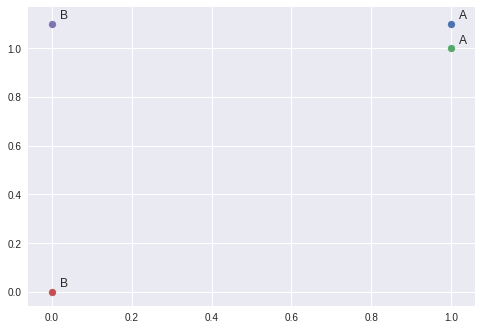

In [6]:
for i in range(group.shape[0]):
  print(i, group[i][0],group[i][1],labels[i])
  plt.scatter(group[i][0],group[i][1])
  plt.text(group[i][0]+0.02,group[i][1]+0.02,labels[i])

In [7]:
df = pd.DataFrame(group, columns=['x','y'])
df

,x,y
0,1.0,1.1
1,1.0,1.0
2,0.0,0.0
3,0.0,1.1


In [0]:
# df = pd.concat((df,pd.Series(labels)),axis=1)

In [9]:
df['label'] = pd.Series(labels)
df

,x,y,label
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,1.1,B


In [10]:
df['cate'] = df['label'].apply(lambda x:0 if x=='A' else 1)
df

,x,y,label,cate
0,1.0,1.1,A,0
1,1.0,1.0,A,0
2,0.0,0.0,B,1
3,0.0,1.1,B,1


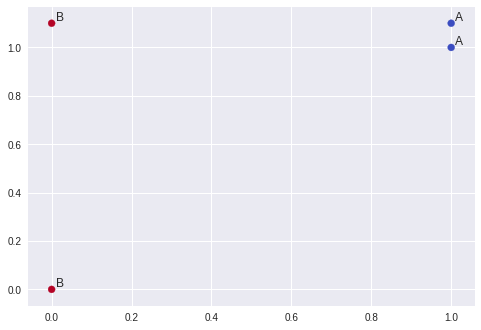

In [11]:
plt.scatter(df.x,df.y,c=df.cate, cmap='coolwarm') # str cannot be used as 'c' value
for i in range(df.shape[0]):
  plt.text(df.x[i]+0.01,df.y[i]+0.01,df.label[i])

## 2-1 KNN Algorithm

In [12]:
def classify0(inX, dataset, labels, k):
  dataset_row = dataset.shape[0]
  diff = np.tile(inX, (dataset_row,1)) - dataset # only copy row, cuz input vector has same dim as dataset
  # each sample in dataset will - input vector, so copy input as the shape of dataset  
  sqdiff = diff**2
  sum_sqdiff = sqdiff.sum(axis=1) # sqdiff.sum() add all elements in matrix
  distance = sum_sqdiff**0.5
  sort_distance_idx = distance.argsort() # can not use sorted(distance) 
  vote_label = {}
  for i in range(k):
    label = labels[ sort_distance_idx[i] ]    
    vote_label[label] = vote_label.get(label,0)+1
#     print(label)
  sort_vote_label = sorted(vote_label.items(), key=lambda x : x[1], reverse=True)
#   print(vote_label,sort_vote_label)
#   print(sqdiff, '\n', sum_sqdiff, '\n',sqdiff.sum(), '\n',distance)
#   print(sort_distance_idx,)

  return sort_vote_label[0][0]


classify0([0,0], group, labels, 3)

'B'

- **np.tile()**

In [13]:
np.tile(['a','b'],(2,2))

array([['a', 'b', 'a', 'b'],
       ['a', 'b', 'a', 'b']], dtype='<U1')

- **dict.get()**

In [0]:
a = {'x':1,'y':2}

In [15]:
a.get('z',0)

0

In [16]:
a['z'] = a.get('z',0)
a

{'x': 1, 'y': 2, 'z': 0}

## Install pydrive to manipulate google drive

###Install

In [17]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 20.7MB/s 
  Running setup.py bdist_wheel for pydrive ... - done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [20]:
!ls

adc.json  sample_data


In [21]:
!pwd

/content


In [0]:
!cd ..

In [23]:
!pwd

/content


### Get root files id

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList() # q = query/search

In [25]:
for file in file_list:
  print(file)
  print('\n title: %s,\n id: %s,\n mimeType: %s \n' % (file['title'], file['id'], file["mimeType"]))

GoogleDriveFile({'kind': 'drive#file', 'id': '1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'etag': '"omwGuTP8OdxhZkubyp-j43cFdJQ/MTU0MDkwODI5MTE0MA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'alternateLink': 'https://drive.google.com/drive/folders/1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'embedLink': 'https://drive.google.com/embeddedfolderview?id=1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.folder', 'title': 'ML_inAction', 'mimeType': 'application/vnd.google-apps.folder', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2018-10-30T14:04:51.140Z', 'modifiedDate': '2018-10-30T14:04:51.140Z', 'modifiedByMeDate': '2018-10-30T14:04:51.140Z', 'lastViewedByMeDate': '2018-11-04T03:52:24.894Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'version': '9', 'par

### Go to subfolder with same command above

In [26]:
# 1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_
ML_inAction_list = drive.ListFile({'q': "'1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_' in parents and trashed=false"}).GetList()
for file in ML_inAction_list:
  print('\n title: %s,\n id: %s,\n mimeType: %s \n' % (file['title'], file['id'], file["mimeType"]))


 title: CH02_KNN.ipynb,
 id: 15Vo7Pq3DswVu8wypdtcF6DD30-iPd-KH,
 mimeType: application/vnd.google.colaboratory 


 title: datingTestSet2.txt,
 id: 17B8sLs13NajyXqUsFsS_R2x8vy6AJtHd,
 mimeType: text/plain 



### Read an existed file

In [27]:
file = drive.CreateFile({'id': "17B8sLs13NajyXqUsFsS_R2x8vy6AJtHd"})
file.GetContentFile('datingTestSet2.txt','text/plain') 
with open('datingTestSet2.txt') as f:
  print(f)
  print(f.readlines())


<_io.TextIOWrapper name='datingTestSet2.txt' mode='r' encoding='UTF-8'>
['40920\t8.326976\t0.953952\t3\n', '14488\t7.153469\t1.673904\t2\n', '26052\t1.441871\t0.805124\t1\n', '75136\t13.147394\t0.428964\t1\n', '38344\t1.669788\t0.134296\t1\n', '72993\t10.141740\t1.032955\t1\n', '35948\t6.830792\t1.213192\t3\n', '42666\t13.276369\t0.543880\t3\n', '67497\t8.631577\t0.749278\t1\n', '35483\t12.273169\t1.508053\t3\n', '50242\t3.723498\t0.831917\t1\n', '63275\t8.385879\t1.669485\t1\n', '5569\t4.875435\t0.728658\t2\n', '51052\t4.680098\t0.625224\t1\n', '77372\t15.299570\t0.331351\t1\n', '43673\t1.889461\t0.191283\t1\n', '61364\t7.516754\t1.269164\t1\n', '69673\t14.239195\t0.261333\t1\n', '15669\t0.000000\t1.250185\t2\n', '28488\t10.528555\t1.304844\t3\n', '6487\t3.540265\t0.822483\t2\n', '37708\t2.991551\t0.833920\t1\n', '22620\t5.297865\t0.638306\t2\n', '28782\t6.593803\t0.187108\t3\n', '19739\t2.816760\t1.686209\t2\n', '36788\t12.458258\t0.649617\t3\n', '5741\t0.000000\t1.656418\t2\n', '285

In [28]:
data_df = pd.read_csv('datingTestSet2.txt',sep='\t',header=None)
print(data_df.shape)
data_df.head()

(1000, 4)


,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


## 2-2 Text to Numpy

1. 每年飞行里程数
2. 玩游戏所占时间百分比
3. 每周消费冰激凌公斤数

In [29]:
fr = open('datingTestSet2.txt')
fr

<_io.TextIOWrapper name='datingTestSet2.txt' mode='r' encoding='UTF-8'>

In [30]:
lines_list = fr.readlines()
lines_list[:2]

['40920\t8.326976\t0.953952\t3\n', '14488\t7.153469\t1.673904\t2\n']

In [31]:
len(lines_list)

1000

In [32]:
np.zeros((len(lines_list),3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [33]:
lines_list[0].strip().split('\t')

['40920', '8.326976', '0.953952', '3']

In [0]:
def file2matrix(filename):
  file = open(filename)
  file_lines = file.readlines()
  length = len(file_lines)
  matrix = np.zeros((length, 3))
  label = []
  for idx, line in enumerate(file_lines):
    split_row = line.strip() # cut by enter \n
    split_element = split_row.split('\t')
    matrix[idx,:] = split_element[0:3] # only 0,1,2 not include 3
    label.append(split_element[-1])
  return matrix,np.array(label)

In [0]:
matrix,label = file2matrix('datingTestSet2.txt')

In [69]:
matrix

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [70]:
matrix.shape

(1000, 3)

In [38]:
label.shape

(1000,)

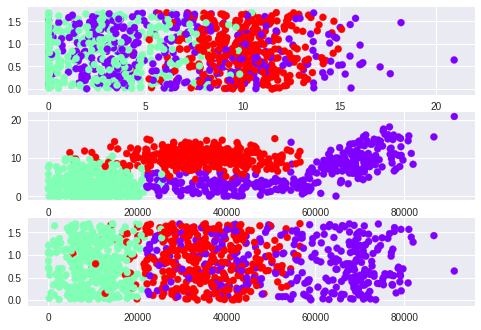

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.scatter(matrix[:,1],matrix[:,2],c=label,cmap='rainbow')

ax2 = fig.add_subplot(312)
ax2.scatter(matrix[:,0],matrix[:,1],c=label,cmap='rainbow')

ax3 = fig.add_subplot(313)
ax3.scatter(matrix[:,0],matrix[:,2],c=label,cmap='rainbow')

## 2-3 Normalization 归一化

- 数值较大的属性会对结果产生较大的影响，因此归一化后，使得各个特征对结果有同样的影响，即每个特征同等重要
- 改变数值范围，虽然增加了分类器的复杂度，但可以得到准确结果
- 
$$ x = \frac{x-min}{max-min} , range(0,1)$$ 

In [49]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 1.1]])

In [47]:
group.min(axis=0) # each col's min and max, for each feature

0.0

In [51]:
group.max(axis=0)

array([1. , 1.1])

In [56]:
np.zeros(group.shape)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [0]:
def autoNorm(dataset):
  min_val = dataset.min(axis=0)
  max_val = dataset.max(axis=0)
  max_min_range = max_val - min_val
  norm_dataset = np.zeros(dataset.shape)
  row = dataset.shape[0]
  norm_dataset = dataset - np.tile(min_val,(row,1))
  norm_dataset = norm_dataset / np.tile(max_min_range,(row,1))
  return norm_dataset, max_min_range, min_val

In [60]:
autoNorm(group)

(array([[1.        , 1.        ],
        [1.        , 0.90909091],
        [0.        , 0.        ],
        [0.        , 1.        ]]), array([1. , 1.1]), array([0., 0.]))

In [0]:
norm_matrix, val_range, min_val = autoNorm(matrix)

In [63]:
norm_matrix

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [64]:
val_range

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [65]:
min_val

array([0.      , 0.      , 0.001156])

## 2-4 Test code of dating website

In [66]:
int(10)

10

In [0]:
def datingClassTest():
  ratio = 0.1
  feature_arr,labels = file2matrix('datingTestSet2.txt')
  norm_feature, val_range, min_val = autoNorm(feature_arr)
  test_sample_num = int(norm_feature.shape[0] * ratio)
  error_count = 0
  for i in range(test_sample_num):
    test_result = classify0(norm_feature[i,:], norm_feature[test_sample_num:,:], labels, 3)
    print('test result is : {}, true label is {}'.format(test_result, label[i]))
    if (test_result != label[i]):
      error_count += 1
  print('Total error rate is: {}'.format(error_count/test_sample_num))

In [76]:
datingClassTest()

test result is : 1, true label is 3
test result is : 3, true label is 2
test result is : 1, true label is 1
test result is : 2, true label is 1
test result is : 2, true label is 1
test result is : 2, true label is 1
test result is : 2, true label is 3
test result is : 1, true label is 3
test result is : 1, true label is 1
test result is : 2, true label is 3
test result is : 2, true label is 1
test result is : 2, true label is 1
test result is : 2, true label is 2
test result is : 3, true label is 1
test result is : 2, true label is 1
test result is : 2, true label is 1
test result is : 3, true label is 1
test result is : 2, true label is 1
test result is : 2, true label is 2
test result is : 3, true label is 3
test result is : 1, true label is 2
test result is : 3, true label is 1
test result is : 3, true label is 2
test result is : 1, true label is 3
test result is : 3, true label is 2
test result is : 2, true label is 3
test result is : 1, true label is 2
test result is : 1, true lab